In [1]:
# import ijson

# # Assume you have a JSON file named 'example.json'
# with open("C:\\Users\\KurtJi\\OneDrive - University of Illinois - Urbana\\Desktop\\Personal Projects\\data\\inaturalist\\val_mini_sample.json", 'r') as f:
#     # Create an iterator for parsing the JSON file
#     parser = ijson.items(f, 'item')

#     # Iterate through each item in the JSON array
#     for item in parser:
#         print(item)


In [2]:
import json

# Create training data
with open("C:\\Users\\KurtJi\\OneDrive - University of Illinois - Urbana\\Desktop\\Personal Projects\\data\\inaturalist\\train_mini_sample.json", 'r') as file:
    # Load JSON data from the file
    train_ann = json.load(file)

# Validating data
with open("C:\\Users\\KurtJi\\OneDrive - University of Illinois - Urbana\\Desktop\\Personal Projects\\data\\inaturalist\\val_mini_sample.json", 'r') as file:
    # Load JSON data from the file
    val_ann = json.load(file)

# Testing data
with open("C:\\Users\\KurtJi\\OneDrive - University of Illinois - Urbana\\Desktop\\Personal Projects\\data\\inaturalist\\test_mini_sample.json", 'r') as file:
    # Load JSON data from the file
    test_ann = json.load(file)


In [3]:
print(len(train_ann['images']), len(val_ann['images']), len(test_ann['images']))

40000 10000 10000


### **Create training/validating/testing sets using dictionaries**

**References**
- Large JSON files: https://pythonspeed.com/articles/json-memory-streaming/

In [ ]:
%pip install Pillow
%pip install matplotlib

In [1]:
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt

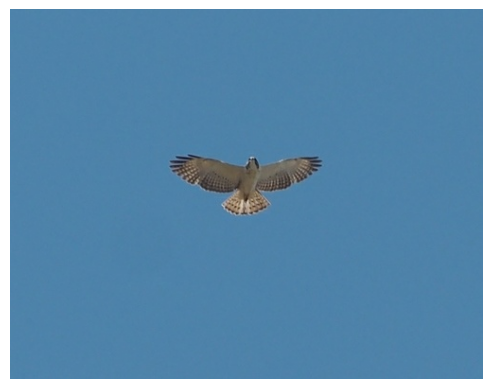

In [4]:
# Specify the path to your image file
image_path = "C:\\Users\\KurtJi\\OneDrive - University of Illinois - Urbana\\Desktop\\Personal Projects\\data\\inaturalist\\train_mini\\03125_Animalia_Chordata_Aves_Accipitriformes_Accipitridae_Buteo_brachyurus\\63b0e206-2cd8-40c0-87c2-a721c9fc45e4.jpg"  # Replace with the actual path

# Read the image
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

In [5]:
import numpy as np
import pandas as pd

In [ ]:
test_ann['images']

In [ ]:
test_ann['categories']

In [7]:
train_ann['categories'][0]

[{'id': 0,
  'name': 'Lumbricus terrestris',
  'common_name': 'Common Earthworm',
  'supercategory': 'Animalia',
  'kingdom': 'Animalia',
  'phylum': 'Annelida',
  'class': 'Clitellata',
  'order': 'Haplotaxida',
  'family': 'Lumbricidae',
  'genus': 'Lumbricus',
  'specific_epithet': 'terrestris',
  'image_dir_name': '00000_Animalia_Annelida_Clitellata_Haplotaxida_Lumbricidae_Lumbricus_terrestris'},
 {'id': 1,
  'name': 'Sabella spallanzanii',
  'common_name': 'Mediterranean Fanworm',
  'supercategory': 'Animalia',
  'kingdom': 'Animalia',
  'phylum': 'Annelida',
  'class': 'Polychaeta',
  'order': 'Sabellida',
  'family': 'Sabellidae',
  'genus': 'Sabella',
  'specific_epithet': 'spallanzanii',
  'image_dir_name': '00001_Animalia_Annelida_Polychaeta_Sabellida_Sabellidae_Sabella_spallanzanii'},
 {'id': 2,
  'name': 'Serpula columbiana',
  'common_name': 'Serpula columbiana',
  'supercategory': 'Animalia',
  'kingdom': 'Animalia',
  'phylum': 'Annelida',
  'class': 'Polychaeta',
  'ord

#### **Load Data**

##### **Create Custome Data Processing Function**

In [22]:
# Create function to process data using annotation
def create_dataset(annotation: dict, dataset: str):

    img_path_array=[]
    img_info_array = []
    cateid_array = []

    for i in range(len(annotation['images'])):

        # read image
        image_path = "C:\\Users\\KurtJi\\OneDrive - University of Illinois - Urbana\\Desktop\\Personal Projects\\data\\inaturalist/" + annotation['images'][i]['file_name']
        # skip this erroneoous directory (cannot read for some reason)
        if annotation['images'][i]['file_name'].startswith(("train" if dataset == 'test' else dataset) + "_mini/05212"):
            continue
        # image_pil = Image.open(image_path)
        # image_array = np.array(image_pil)
        
        # image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
        # image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
        # image=np.array(image)
        # image = image.astype('float32')
        # image /= 255 

        # fetch image information
        # fetch date
        image_date = annotation['images'][i]['date']
        # fetch location
        image_loc = [annotation['images'][i]['latitude'], annotation['images'][i]['longitude']]
        # fetch image size
        image_size = [annotation['images'][i]['width'], annotation['images'][i]['height']]
        
        # fetch categories
        image_id = annotation['images'][i]['id']
        # check conditions
        if annotation['annotations'][i]['image_id'] != image_id:
            print('id not match')
            break

        category_id = annotation['annotations'][i]['category_id']
        
        # create lists for data
        img_path_array.append(image_path)
        img_info_array.append([image_date, image_loc, image_size])
        cateid_array.append(category_id)

    # Create a Pandas DataFrame
    df = pd.DataFrame({
        'image_path': img_path_array,
        'image_info': img_info_array,
        'category_id': cateid_array
    })

    # Write the DataFrame to a CSV file
    csv_path = f'C:\\Users\\KurtJi\\OneDrive - University of Illinois - Urbana\\Desktop\\Personal Projects\\data\\inaturalist\\data_csv\\{dataset}_dataset.csv'
    df.to_csv(csv_path, index=False)

    return img_path_array, img_info_array, cateid_array

In [13]:
def get_image_label(cateid: int, categories, type: str):
    # categories should look like this: test_ann['categories']
    cate_list = list(categories[0][0].keys())[1:]
    if type not in cate_list:
        return "please enter correct category level"

    return categories[0][cateid][type]

In [14]:
get_image_label(996, test_ann['categories'], 'common_name')

'Pink Underwing'

##### **Load Training/Test/Val Data**

In [23]:
# extract the image array and class name
train_data, train_info, train_cateid = create_dataset(train_ann, 'train')

In [24]:
# extract the image array and class name
val_data, val_info, val_cateid = create_dataset(val_ann, 'val')

In [25]:
# extract the image array and class name
test_data, test_info, test_cateid = create_dataset(test_ann, 'test')

#### **Create Custom Datasets**

Reference:
- https://towardsdatascience.com/loading-custom-image-dataset-for-deep-learning-models-part-1-d64fa7aaeca6

In [ ]:
##
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r'CV\Intel_Images\seg_train\seg_train')

In [13]:
train_data[0].keys()

dict_keys(['image', 'image_id', 'image_date', 'image_loc', 'image_size', 'image_category'])

#### **Use PyTorch Dataloader**

**Reference**:
- Different size: https://datascience.stackexchange.com/questions/40462/how-to-prepare-the-varied-size-input-in-cnn-prediction
- Custom Dataloader: https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

In [12]:
import torch
from torch.utils.data import Dataset

In [ ]:
# 
class CustomImageDataset(Dataset):
    def __init__(self, data_dict, transform=None):
        self.data_dict = data_dict
        self.transform = transform

    def __len__(self):
        return len(self.data_dict)

    def __getitem__(self, idx):
        sample = self.data_dict[idx]

        image_array = sample['image']
        image_id = sample['image_id']
        image_date = sample['image_date']
        image_size = sample['image_size']

        if self.transform:
            image_array = self.transform(image_array)

        return {'image': image_array, 'date': image_size, 'width': image_size[0], 'height': image_size[1]}



In [ ]:
from torchvision import transforms

# Define your transformations
your_transform = transforms.Compose([
    transforms.Resize((256, 256)),      # Resize to a fixed size
    transforms.ToTensor(),              # Convert to a PyTorch tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the pixel values
])


In [ ]:
# Example usage:
# Assuming 'your_data_dict' is your dictionary containing image information
# and 'your_transform' is a torchvision.transforms.Compose for preprocessing.
custom_dataset = CustomImageDataset(data_dict=your_data_dict, transform=your_transform)

# Create a DataLoader for the dataset
dataloader = torch.utils.data.DataLoader(custom_dataset, batch_size=32, shuffle=True)

# Now you can iterate over the batches in the DataLoader
for batch in dataloader:
    images = batch['image']
    dates = batch['date']
    sizes = batch['size']
    # Your training or validation logic goes here
    # ...


In [11]:
print(len(train_data), len(val_data), len(test_data))

39997 10000 9998


In [20]:
for i in range(len(train_data)):
    if i in train_data:
        with open(f'data/train_data/{i}.npy', 'wb') as f:
            np.save(f, train_data[i])


In [21]:
for i in range(len(val_data)):
    if i in val_data:
        with open(f'data/val_data/{i}.npy', 'wb') as f:
            np.save(f, val_data[i])

In [22]:
for i in range(len(test_data)):
    if i in test_data:
        with open(f'data/test_data/{i}.npy', 'wb') as f:
            np.save(f, test_data[i])